Análisis de precios de viviendas en King County (EE. UU.)

Este proyecto realiza un análisis exploratorio y predictivo sobre los precios de viviendas en King County (EE.UU.) usando Python. Se busca entender qué variables influyen más en el precio y evaluar modelos de regresión lineal simple y múltiple.
Se emplean librerías como **Pandas**, **Matplotlib**, **Seaborn** y **Scikit-learn** para la exploración, visualización y modelado predictivo de los datos.

Carga y exploración inicial de los datos
En esta sección se importan las librerías necesarias y se realiza una primera exploración del conjunto de datos `kc_house_data.csv`.


In [57]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Configuración general
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")

# Cargar el dataset
datos = pd.read_csv("kc_house_data.csv")

# Vista previa
print("Vista previa del conjunto de datos:")
display(datos.head())


Vista previa del conjunto de datos:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Estructura y calidad del conjunto de datos
Verficacion del tipo de datos en cada columna, verificar presencia de nulos y obtener estadisticas descriptivas iniciales.

In [59]:

# Tipos de datos
print("Tipos de datos en el dataset:")
print(datos.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(datos.isnull().sum())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
display(datos.describe().T)


Tipos de datos en el dataset:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Valores nulos por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtyp

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Limpieza inicial del dataset
Se eliminan columnas irrelevantes o con información no útil para el modelo (por ejemplo, `id` o `date`), y se corrigen posibles errores de formato. Aunque en este caso no es necesario ya que el data set esta muy limpio, aun asi se hara de manera de demostracion

In [61]:
# Eliminar columnas irrelevantes
datos.drop(['id', 'date'], axis=1, inplace=True, errors='ignore')

# Confirmar estructura después de limpieza
print("Columnas después de la limpieza:")
print(datos.columns)


Columnas después de la limpieza:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


 Análisis exploratorio y visualización de datos
En esta etapa se analizan las variables del conjunto de datos para entender cómo se distribuyen y cómo se relacionan con el precio de las viviendas.  
Se utilizan gráficos de distribución, boxplots y mapas de calor para detectar patrones correlaciones y posibles valores atípicos.

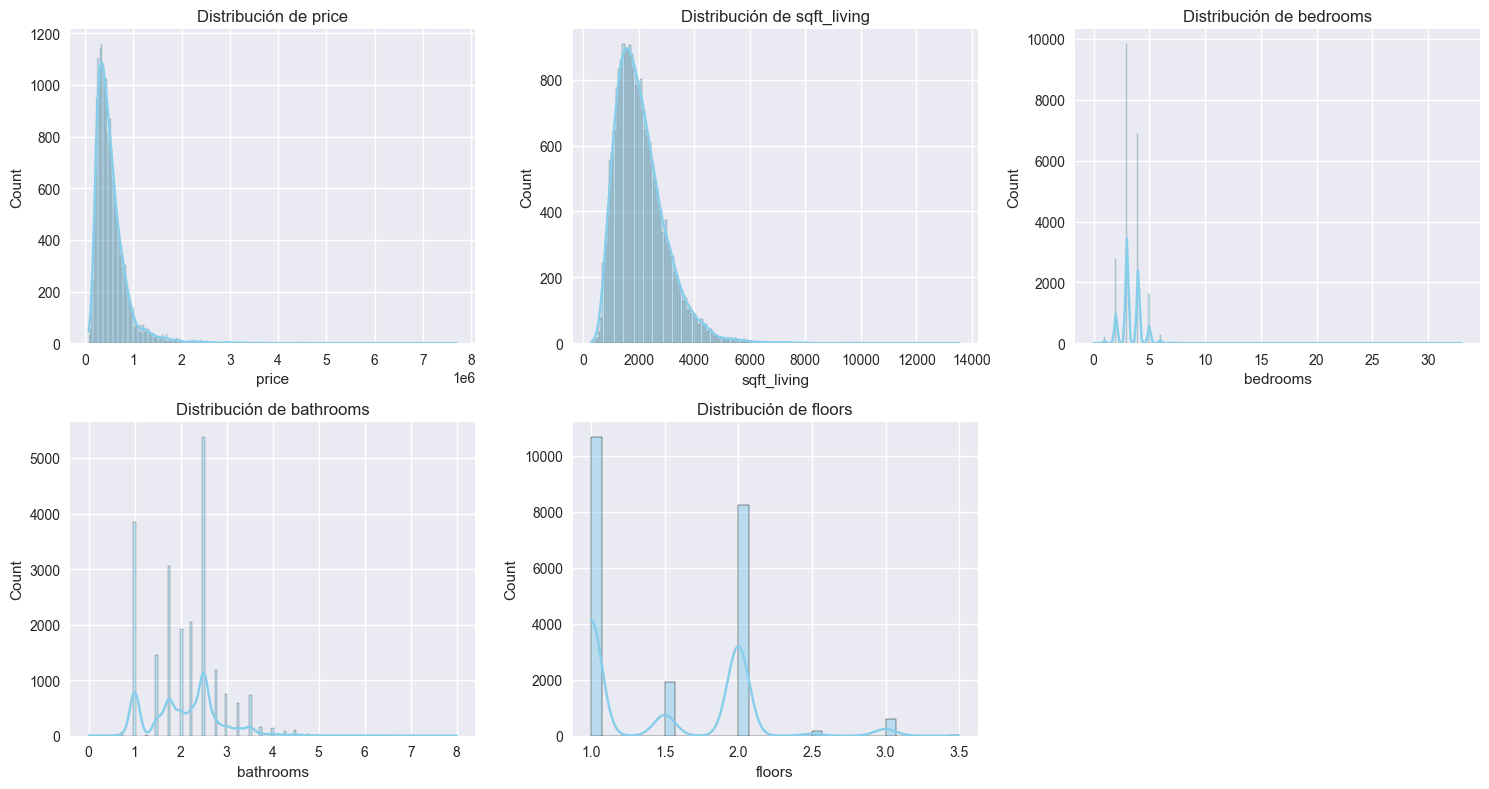

In [63]:
#con esto revisamos si las variables estan cesgadas
plt.figure(figsize=(15, 8))

variables = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']
for i, col in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(datos[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
    
plt.tight_layout()
plt.show()

En los gráficos se observa la distribución de las variables price, sqft_living, bedrooms, bathrooms y floors.

La mayoría de las variables presentan distribuciones sesgadas a la derecha, lo que indica que existen pocos valores extremadamente altos (outliers) frente a una gran cantidad de observaciones con valores bajos o medios.

In [64]:
# Eliminamos la columna 'id' que no aporta información relevante
datos.drop(['id'], axis=1, inplace=True, errors='ignore')

print("Valores nulos por columna después de limpieza:")
print(datos.isnull().sum())

Valores nulos por columna después de limpieza:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [65]:
#Conteo de casas por numero de pisos y resumen 
print("Cantidad de casas por número de pisos:")
print(datos['floors'].value_counts())

floors_count = datos['floors'].value_counts().to_frame()
floors_count.rename(columns={'count': 'numero_casas'}, inplace=True)
display(floors_count.head())


Cantidad de casas por número de pisos:
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64


,numero_casas
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161


Este boxplot es super importante ya que nos deja visualizar COMO influye el que una casa tenga vista al agua(waterfront)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4380\1478701519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos, x='waterfront', y='price_viz', palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4380\1478701519.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = datos.groupby('waterfront')['price'].agg(['median','mean','count']).reset_index()


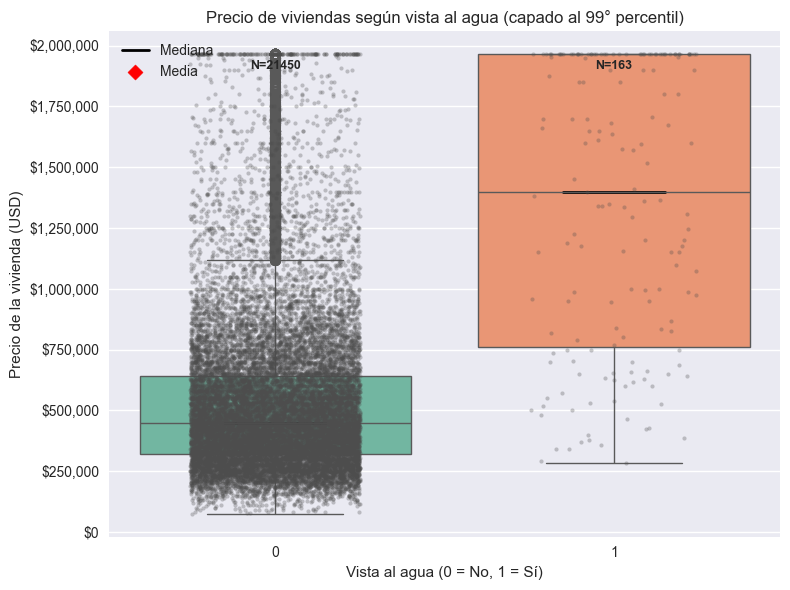

,waterfront,median,mean,count
0,0,"450,000","531,564","21,450"
1,1,"1,400,000","1,661,876",163


In [67]:

datos['waterfront'] = datos['waterfront'].astype(int).astype('category')
cap = datos['price'].quantile(0.99)
datos['price_viz'] = datos['price'].clip(upper=cap)

plt.figure(figsize=(8,6))
ax = sns.boxplot(data=datos, x='waterfront', y='price_viz', palette='Set2')
sns.stripplot(data=datos, x='waterfront', y='price_viz', color='0.3', alpha=0.3, jitter=0.25, size=3)

group_stats = datos.groupby('waterfront')['price'].agg(['median','mean','count']).reset_index()

for i, row in group_stats.iterrows():
    xpos = i
    med = row['median'] if row['median'] <= cap else cap
    mean = row['mean'] if row['mean'] <= cap else cap
    cnt = int(row['count'])
    ax.text(xpos, datos['price_viz'].max()*0.97, f"N={cnt}", ha='center', fontsize=9, fontweight='bold')
    ax.plot([xpos-0.15, xpos+0.15], [med, med], color='black', linewidth=2, label='Mediana' if i == 0 else "")
    ax.scatter(xpos, mean, marker='D', color='red', s=60, label='Media' if i == 0 else "")

ax.set_title('Precio de viviendas según vista al agua (capado al 99° percentil)')
ax.set_xlabel('Vista al agua (0 = No, 1 = Sí)')
ax.set_ylabel('Precio de la vivienda (USD)')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

handles, labels = ax.get_legend_handles_labels()
ax.legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys(), loc='upper left')

plt.tight_layout()
plt.show()

display(group_stats.style.format({'median': '{:,.0f}', 'mean': '{:,.0f}', 'count': '{:,.0f}'}))


Este gráfico muestra la relación entre el tamaño del área habitable sobre 
el suelo (sqft_above) y el precio de la vivienda (price).

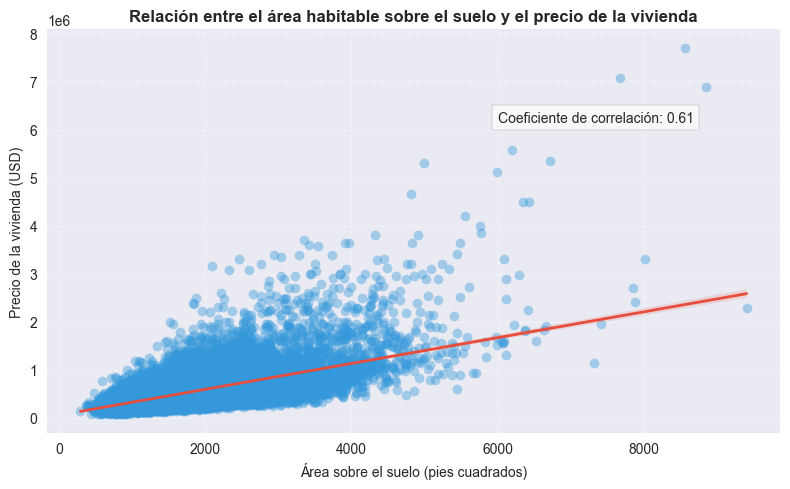

In [69]:

plt.figure(figsize=(8,5))
sns.regplot(
    x="sqft_above", 
    y="price", 
    data=datos,
    scatter_kws={"alpha":0.4, "color":"#3498db"},   # puntos semi-transparentes
    line_kws={"color":"#e74c3c", "lw":2},           # línea roja más gruesa
)

plt.title("Relación entre el área habitable sobre el suelo y el precio de la vivienda", fontsize=12, fontweight='bold')
plt.xlabel("Área sobre el suelo (pies cuadrados)", fontsize=10)
plt.ylabel("Precio de la vivienda (USD)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)

# Calcular y mostrar correlación
corr = datos["sqft_above"].corr(datos["price"])
plt.text(
    6000, datos["price"].max()*0.8,
    f"Coeficiente de correlación: {corr:.2f}",
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.tight_layout()
plt.show()


En este gráfico se analiza cómo influye el área construida sobre el suelo (sqft_above) en el precio de las viviendas. La línea roja representa la tendencia lineal general, mientras que los puntos azules muestran los valores reales.

Se observa una correlación positiva moderada (r = 0.61), lo que indica que las casas con mayor superficie sobre el suelo tienden a tener precios más altos.

Ver coeficientes del modelo para interpretar cuanto cambia el precio por cada unidad adicional de sqft_living

In [71]:
print("Intercepto (b₀):", lm.intercept_)
print("Coeficiente (b₁):", lm.coef_[0])

Intercepto (b₀): -43580.743094473146
Coeficiente (b₁): 280.62356789744786


Modelo de regresión lineal simple: precio vs área habitable

R² del modelo usando sqft_living: 0.493
Intercepto (b₀): -43,580.74
Coeficiente (b₁): 280.62


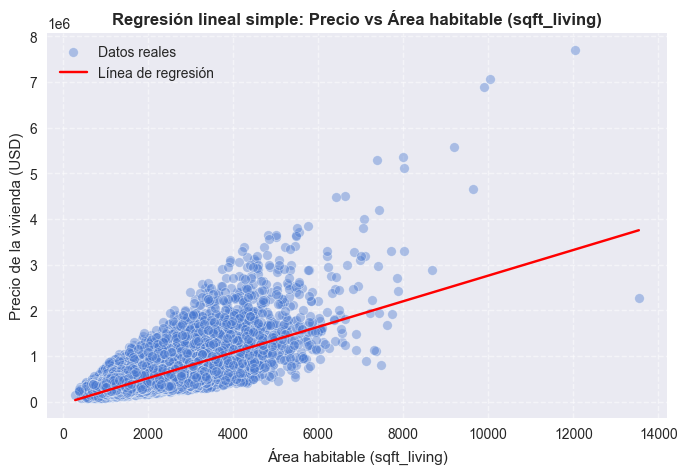

MAE (Error absoluto medio): 173,688
RMSE (Raíz del error cuadrático medio): 261,441
R² (Coeficiente de determinación): 0.493


In [73]:

X = datos[['sqft_living']]
Y = datos['price']


lm = LinearRegression()
lm.fit(X, Y)


r2 = lm.score(X, Y)
intercepto = lm.intercept_
coef = lm.coef_[0]

print(f"R² del modelo usando sqft_living: {r2:.3f}")
print(f"Intercepto (b₀): {intercepto:,.2f}")
print(f"Coeficiente (b₁): {coef:,.2f}")


Y_pred = lm.predict(X)
datos['pred_price'] = Y_pred


plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', data=datos, alpha=0.4, label='Datos reales')
sns.lineplot(x='sqft_living', y='pred_price', data=datos, color='red', label='Línea de regresión')

plt.title("Regresión lineal simple: Precio vs Área habitable (sqft_living)", fontsize=12, fontweight='bold')
plt.xlabel("Área habitable (sqft_living)")
plt.ylabel("Precio de la vivienda (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


mae = mean_absolute_error(Y, Y_pred)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

print(f"MAE (Error absoluto medio): {mae:,.0f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:,.0f}")
print(f"R² (Coeficiente de determinación): {r2:.3f}")

En esta gráfica se observa la relación entre el tamaño de la vivienda (área habitable en pies cuadrados) y su precio. La línea roja muestra la regresión lineal simple ajustada por el modelo, mientras que los puntos azules representan los datos reales.

Se aprecia una tendencia positiva, lo que indica que, en general, a mayor área habitable, mayor es el precio. Sin embargo, la dispersión de los puntos alrededor de la línea demuestra que el tamaño no es el único factor que influye en el valor de una vivienda, por lo que se justifica el uso posterior de un modelo de regresión múltiple para considerar más variables.

## Modelo de regresión múltiple

Se ajusta un modelo de **regresión lineal múltiple** para explicar el precio de las viviendas usando varias características simultáneamente (área habitable, número de habitaciones,baños, pisos, calidad de construcción, vista y condición).
A diferencia de la regresión simple, el modelo múltiple permite medir el efecto **parcial** de cada variable mientras controla por las demás, mejorando la capacidad explicativa y 
produciendo estimaciones más realistas del impacto de cada atributo en el precio.


In [75]:
#test/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [76]:
lm_multi = LinearRegression()
lm_multi.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
y_pred_train = lm_multi.predict(X_train)
y_pred_test  = lm_multi.predict(X_test)

In [78]:
def print_metrics(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:,.0f} | RMSE: {rmse:,.0f} | R²: {r2:.3f}")

print_metrics(y_train, y_pred_train, "Train")
print_metrics(y_test,  y_pred_test,  "Test")


Train MAE: 172,365 | RMSE: 257,525 | R²: 0.492
Test MAE: 177,868 | RMSE: 276,559 | R²: 0.494


In [79]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': lm_multi.coef_
}).sort_values(by='coef', key=abs, ascending=False)
display(coef_df.style.format({'coef':'{:+,.2f}'}))


,feature,coef
0,sqft_living,+279.55


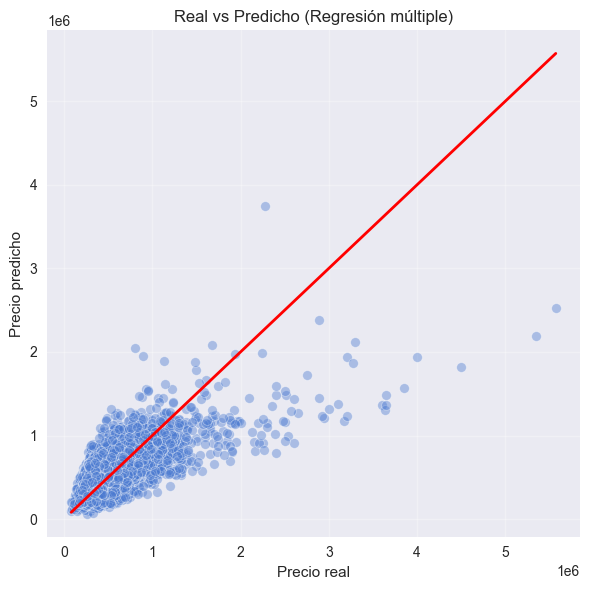

In [80]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # identidad
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Real vs Predicho (Regresión múltiple)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

En este gráfico se comparan los precios reales de las viviendas (eje X) con los precios predichos por el modelo (eje Y).

La línea roja representa la línea ideal donde el modelo haría predicciones perfectas (es decir, precio real = precio predicho).

Los puntos azules muestran las observaciones del conjunto de prueba. Cuanto más cerca estén de la línea roja, mejor capacidad predictiva tiene el modelo.

En este caso, se observa que la mayoría de los puntos se concentran cerca de la línea, aunque existe cierta dispersión para precios altos. Esto indica que el modelo funciona bien para la mayoría de las viviendas, pero tiende a tener más error en propiedades de precio elevado, lo cual es común en modelos lineales por la presencia de outliers y relaciones no lineales.

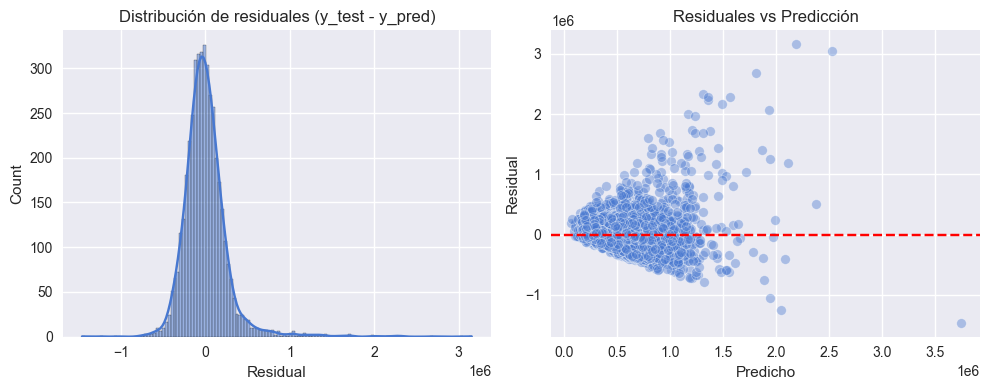

In [81]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Distribución de residuales (y_test - y_pred)")
plt.xlabel("Residual")

plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuales vs Predicción")
plt.xlabel("Predicho")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()


Los residuos representan la diferencia entre los valores reales y los valores predichos por el modelo.

En el gráfico de la izquierda, se muestra la distribución de los residuos. Su forma aproximadamente simétrica y centrada alrededor de cero indica que el modelo no presenta sesgos importantes y que los errores son aleatorios.

En el gráfico de la derecha, se observa la relación entre los valores predichos y sus residuos. La mayoría de los puntos están distribuidos de manera aleatoria alrededor de la línea roja (residuo = 0), lo que sugiere que el modelo captura bien la tendencia general. Sin embargo, la ligera dispersión creciente en precios altos muestra que el modelo pierde precisión en viviendas más costosas, posiblemente por efectos no lineales o variables omitidas.